# Module 5 Matrix computation
(Partially adapted from Newman 2012 Chapter 6 )

One of the most common uses of computers in physics is the solution of sets of equations using linear algebra. In this Module we will look at two examples for solving eigenvalue problems using Numpy. We first begin with some basics linear algebra operations.

Taking rows and columns is just slicing 2D array as usual:

In [ ]:
import numpy as np
A = np.array([[2, 6], [0, -1]])
print(A[0,:])  # first row
print(A[:,1])  # second column

Finding the inverse of a matrix:

In [ ]:
np.linalg.inv(A)  # inverse matrix

Finding the determinant of a matrix:

In [ ]:
np.linalg.det(A)  # determinant

Taking dot products:

In [ ]:
a = np.array([4, 1])
b = np.array([0, 1])
print("A.a = " , np.dot(A, a))         # dot product between a matrix and a vector
print("a.b = " ,np.dot(a, b))         # dot product between vectors

Finding the eigenvalues $\lambda$ and eigenvectors $\boldsymbol{x}$ of a matrix:

In [ ]:
eig_values, eig_vectors = np.linalg.eig(A)
print("eigenvalues are ", eig_values)
print("eigenvectors are \n", eig_vectors)

<div class="span alert alert-success">
    
In this example, there are two eigenvectors, each with length two. Are they arranged as two columns or two rows? Check out the documentation page to find out
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
    
Then test it out on an eigenvector of your choice. For example, if you think the first eigenvector is the first column $\boldsymbol{x_1}=$(1,0) corresponding to the first eigenvalue $\lambda_1=2$, then verify that $\boldsymbol{A} \boldsymbol{x_1} = \lambda_1 \boldsymbol{x_1}$

In [ ]:
#your code here

<div class="span alert alert-success">
Verify a well-known result in linear algebra: the eigenvector matrix can be used to diagonalize matrix $\boldsymbol{A}$, where the eigenvalues lie on the diagonals.

$$
\boldsymbol{x}^{-1}\boldsymbol{A} \boldsymbol{x} =
\left(\begin{array}{cc}
\lambda_1 & 0  \\
0 & \lambda_2  \\
\end{array}\right)
$$

In [ ]:
#your code here


## Option 1. Asymmetric Quantum Well

Quantum mechanics can be formulated as a matrix problem and solved on a computer using linear algebra methods. Suppose, for example, we have a particle of mass $M$ in a one-dimensional quantum well of width $L$, but not a square well like the ones you commonly find discussed in textbooks. Suppose instead that the potential V(x) varies somehow inside the well:

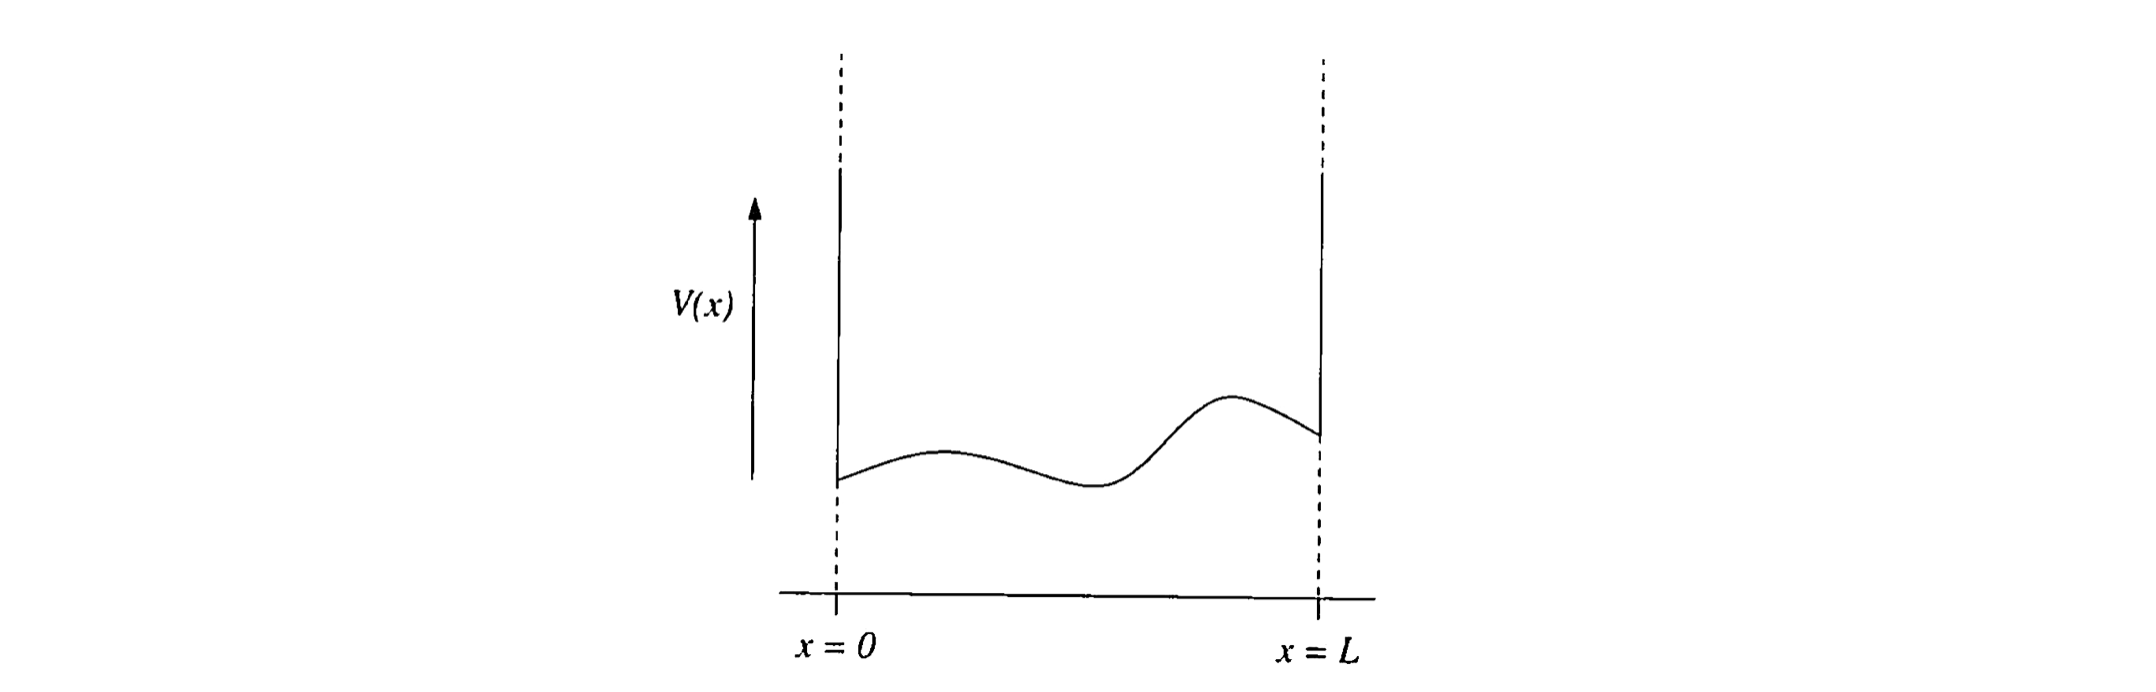
<p style="text-align:center"> (from Newman page 248) </p>


We cannot solve such problems analytically in general, but we can solve them on the computer.

In a pure state of energy $E$, the wavefunction $\psi(x)$ obeys the time-independent Schrödinger equation $\hat{H}\psi(x) =
E\psi(x)$, where the Hamiltonian operator $\hat{H}$ is given by

$$
\hat{H} = - {\hbar^2\over2M}\,{ d^2\over d x^2} + V(x).
$$	

For simplicity, let's assume that the walls of the well are infinitely
high, so that the wavefunction is zero outside the well, which means it
must go to zero at $x=0$ and $x=L$.  In that case, the wavefunction
can be expressed as a sine series thus:

$$
\psi(x) = \sum_{n=1}^\infty c_n \sin {\pi n x\over L},
$$
where $c_1,c_2,\ldots$ are coefficients.


Using the fact that, for $m,n$ positive integers
$$\begin{align}
\int_0^L \sin {\pi m x\over L} \,\sin{\pi n x\over L} \> d x
  = \begin{cases}
      L/2 & \qquad\mbox{if $m=n$,} \\
      0          & \qquad\mbox{otherwise,}
    \end{cases}
\end{align}$$

verify that the Schrödinger equation $\hat{H}\psi = E\psi$ implies that
$$\begin{align}
\sum_{n=1}^\infty c_n \int_0^L \sin{\pi m x\over L}
                  \hat{H}\sin{\pi n x\over L} \> d x
  = \frac{1}{2} L E c_m.
\end{align}$$

Hence, defining a matrix $\bf{H}$ with elements
$$\begin{align}
H_{mn} &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \hat{H}\sin{\pi n x\over L} \> d x \nonumber\\
       &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \biggl[ - {\hbar^2\over2M}\,{ d^2\over d x^2} + V(x) \biggr]
          \sin{\pi n x\over L} \> d x,
\end{align}$$

verify that Schrödinger's equation can be written in matrix form as
$\boldsymbol{H}\boldsymbol{\psi} = E\boldsymbol{\psi}$, where $\boldsymbol{\psi}$
is the vector $(c_1,c_2,\ldots)$.  Thus $\boldsymbol{\psi}$ is an
eigenvector of the *Hamiltonian matrix* $\bf{H}$ with eigenvalue $E$.
If we can calculate the eigenvalues of this matrix, then we know the
allowed energies of the particle in the well.


For the case $V(x)=ax/L$, evaluate the integral in $H_{mn}$
  analytically and so find a general expression for the matrix
  element $H_{mn}$.  Verify that the matrix is real and symmetric.  You'll
  probably find it useful to know that
$$\begin{align}
\int_0^L x \sin{\pi m x\over L} \sin{\pi n x\over L} \> d x
  = \begin{cases}
      0 & \quad\mbox{if $m\ne n$ and both even or both odd,} \\
      {\displaystyle-\biggl({2L\over\pi}\biggr)^2{mn\over(m^2-n^2)^2}}
        & \quad\mbox{if $m\ne n$ and one is even, one is odd,} \\
      L^2/4 & \quad\mbox{if $m=n$.}
    \end{cases}
\end{align}$$

<div class="span alert alert-success">

1. Write a Python program to evaluate your expression for $H_{mn}$ for
arbitrary $m$ and $n$ when the particle in the well is an electron, the
well has width 5 Å, and $a=10\,$eV.  The mass and charge of an
electron are $9.1094\times10^{-31}\,$kg and $1.6022\times10^{-19}\,$C
respectively.

In [ ]:
import numpy as np

L=5e-10 
a=10 * 1.6e-19  

mass=9.11e-31
hb = 6.63e-34 / 2/np.pi

def H(m,n):


The matrix $\bf{H}$ is in theory infinitely large, so we cannot
  calculate all its eigenvalues.  But we can get a pretty accurate solution
  for the first few of them by cutting off the matrix after the first few
  elements.  
  
<div class="span alert alert-success">

2. Modify the program you wrote for step 1 above to create a $10\times10$ array of the elements of $\bf{H}$ up to $m,n=10$. Calculate the eigenvalues of this matrix using the eigh() function from numpy.linalg and hence print out, in units of electron volts, the first ten energy levels of the quantum well, within this approximation.  You should find, for example, that the ground-state energy of the system is around $5.84\,$eV.  

</div>

Compared with the more general np.linalg.eig() function, the np.linalg.eigh() function applies only to Hermitian matrices (real eigenvalues), with the additional benefit that all eigenvalues are ordered. 
    
You can refer to the documentation on whether the eigenvalues are in ascending for descedning order, or check it for yourself.
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

(Hint: Bear in mind that matrix indices in Python start at zero, while the indices in standard algebraic expressions, like those above, start at one.  You will need to make allowances for this in your program.)



In [ ]:
from numpy.linalg import  eigh

def solveH(size=10):

<div class="span alert alert-success">

3. Using the first eigenvalue (ground-state energy $E_0$) and corresponding first eigenvector $\psi_0$ to verify that $H \psi_0 = E_0 \psi_0 $. You'll need to use the np.dot() function for this step.
    
Repeat for the second eigenvalue.
    
Verify that the first two eigenvectors are orthogonal to each other.
</div>

In [ ]:
# Your code here

<div class="span alert alert-success">

4. Modify your program to use a $100\times100$ array instead and again
  calculate the first ten energy eigenvalues.  Comparing with these values,
 what were the errors of the energy eigenvalues you calculated in step 3?

In [ ]:
# Your code here

<div class="span alert alert-success">

5. Calculate the wavefunction $\psi(x)$ for the ground state and the first two excited
  states of the well.  Use your results to make a graph with three curves
  showing the probability density $|\psi(x)|^2$ as a function of $x$ in
  each of these three states.  
    
</div>
    
Pay special attention to the normalization of the wavefunction – it should satisfy the condition $\int_0^L  |\psi(x)|^2 \> d x=1$.  If this is not the case then you should make sure each wavefunction is normalized.

An example output is provided below

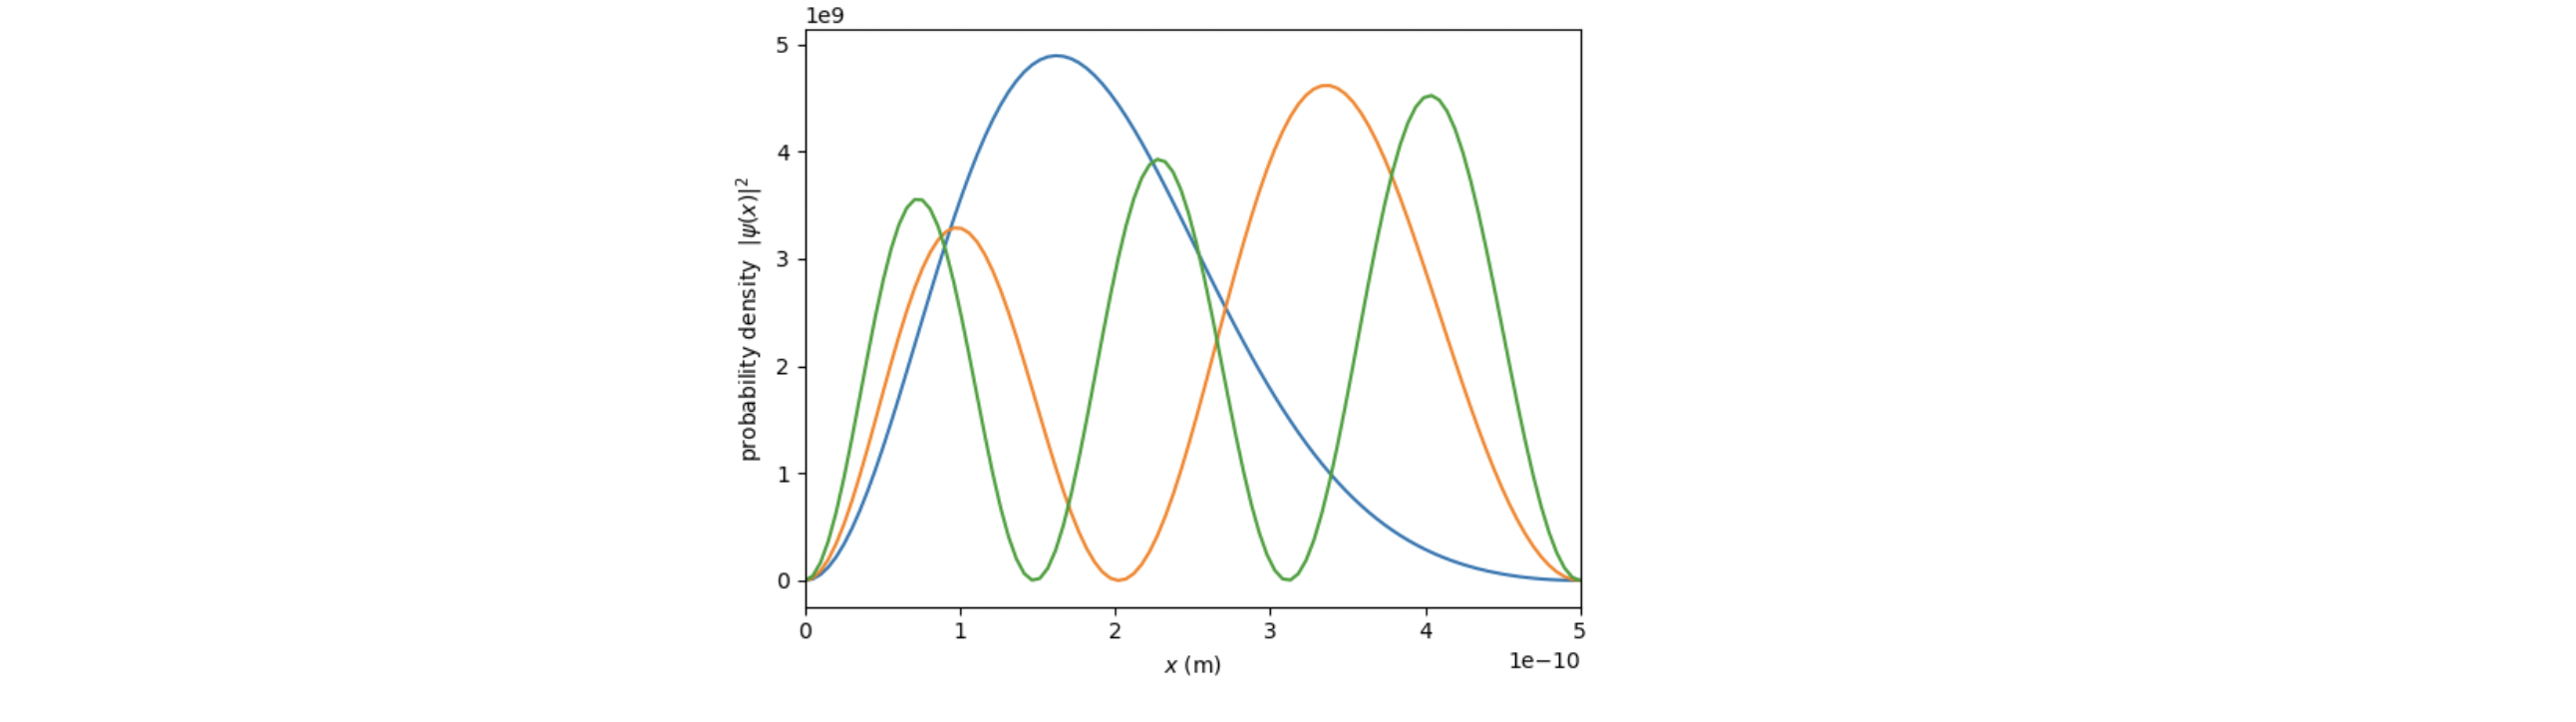



In [ ]:
#Your code here

xgrid = 100
x=np.linspace(0,L,xgrid)

plt.xlim(0,L) 
plt.ylabel('probability density  $|\psi(x)|^2$')
plt.xlabel("$x$ (m)")

# Option 2, Vibrations of a 1D Oscillator Chain

(Adapted from Newman 2012 Example 6.2 on page 235)

In this project, we'll demonstrate using linear algebra to solve for the motion of a classical mechanics system – coupled oscillators. Instead of explictly solving for the dynamics of such systems using ODEs in PHYS 3510 (which we've tried for a two oscillator system), here we will turn the problem into an eigenvalue problem that can be solved more easily. 

Suppose we have a set of $N$ identical masses in a row, joined by identical linear
springs,

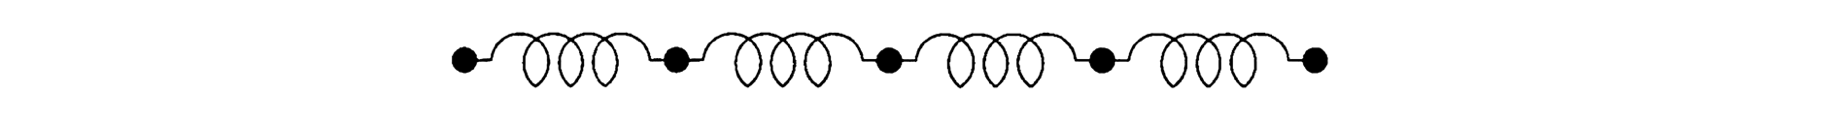

For simplicity, we'll ignore gravity – the masses and springs are floating in outer space. If we jostle this system the masses will vibrate relative to one another under the action of the springs. The motions of the system could be used as a model of the vibration of atoms in a solid, which can be represented with reasonable accuracy in exactly this way. Here we examine the modes of horizontal vibration of the system.

Let us denote the displacement of the ith mass relative to its rest position by $x_i$. Then the equations of motion for the system are given by Newton's second law:

$$
\tag*{6.50}
m \frac{\mathrm{d}^2 x_i}{\mathrm{~d} t^2}=k\left(x_{i+1}-x_i\right)+k\left(x_{i-1}-x_i\right)
$$

where $m$ is the mass and $k$ is the spring constant. The left-hand side of this equation is just mass times acceleration, while the right-hand side is the force on mass $i$ due to the springs connecting it to the two adjacent masses. The only exceptions to Eq. (6.50) are for the masses at the two ends of the line, for which there is only one spring force each, so that they obey the equations

$$
\tag*{6.51}
m \frac{\mathrm{d}^2 x_1}{\mathrm{~d} t^2}  =k\left(x_2-x_1\right)
$$

$$
\tag*{6.52}
m \frac{\mathrm{d}^2 x_N}{\mathrm{~d} t^2}  =k\left(x_{N-1}-x_N\right)
$$


If the system is a vibrational mode with a well-defined frequency (an **eigenmode**), the overall solution for the positions of the atoms will take the form

$$
\tag*{6.53}
x_i(t) =  A_i e^{i\omega t}
$$
for all $i$, where $A_i$ is the amplitude of vibration of mass $i$ and its phase controls the phase of the vibration relative to the driving force.
Substituting Eq. (6.53) into Eqs. (6.50) to (6.52) we find that

$$
\begin{aligned}
-m \omega^2 A_1 & =k\left(A_2-A_1\right) \\
-m \omega^2 A_i & =k\left(A_{i+1}-A_i\right)+k\left(A_{i-1}-A_i\right) \\
-m \omega^2 A_N & =k\left(A_{N-1}-A_N\right)
\end{aligned}
$$
These equations can be rearranged to read

$$
\begin{aligned}
k A_1-k A_2 & = m\omega^2 A_1, \\
2k A_i-k A_{i-1}-k A_{i+1} & = m\omega^2 A_i, \\
k A_N-k A_{N-1} & = m\omega^2 A_N,
\end{aligned}
$$

Thus in matrix form we have:
$$
\left(\begin{array}{cccccc}
k & -k & & & & \\
-k & 2k & -k & & & \\
& -k & 2k & -k & & \\
& & \ddots & \ddots & \ddots & \\
& & & -k & 2k & -k \\
& & & & -k & k
\end{array}\right)\left(\begin{array}{c}
A_1 \\
A_2 \\
A_3 \\
\vdots \\
A_{N-1} \\
A_N
\end{array}\right)=m\omega^2\left(\begin{array}{c}
A_1 \\
A_2 \\
A_3 \\
\vdots \\
A_{N-1} \\
A_N
\end{array}\right) .
$$
This is precisely in the form of an eigenvalue problem!



<div class="span alert alert-success">

1. Write a program to solve this eigenvalue problem for the case where $N = 2$ (two oscillators), $m =1$ and $k = 6$. You'll need to use the eigh() function from numpy.linalg to solve for the eigenvalues and eigenvectors. 
</div>    

Compared with the more general np.linalg.eig() function, the np.linalg.eigh() function applies only to Hermitian matrices (real eigenvalues), with the additional benefit that all eigenvalues are ordered. 
    
You can refer to the documentation on whether the eigenvalues are in ascending for descedning order, or check it for yourself.
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

N =2
m = 1.0
k = 6.0

w,v = np.linalg.eigh(A)

<div class="span alert alert-success">

2. First sketch out on paper what the two vibrational eigenmodes would look like without referring to the eigenvectors you found. Then, using the eigenvectors you found, make an animation of the two oscillators vibrating along $x$ using the templete animation code below. Are these vibrational modes the same as what you sketched out?

In [ ]:
%matplotlib notebook

import matplotlib.animation as ani

L=3
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
ax.set_aspect('equal')

points, = ax.plot([], [], 'o' , lw=2)

t_range = np.arange(0,1000,0.1) 
index=2
x0_list = 1*np.cos(t_range)
x1_list = 1*np.cos(t_range)


def animate(i):
    points.set_data([ -2+x0_list[i], 2+x1_list[i] ],[0,0])
    return points,

ani = ani.FuncAnimation(
    fig, animate, len(t_range), interval=1, blit=True)
plt.show()


<div class="span alert alert-success">

3. Repeat the above steps for N=3 and N=20. What does the lowest-frequency mode share in common in the N=2,3, and 20 cases. How about the highest-frequency mode?


In [ ]:
#Your code 

<div class="span alert alert-success">

4. Modify your code to remove the two loose ends of the chain by implementing periodic boundary conditions.


In [ ]:
#Your code 

<div class="span alert alert-success">

5. Make a histogram of all the frequencies of a this 1D chain model. Are there more vibrational mode with high frequencies or low frequencies? 

</div>

You may have encountered (or may soon encounter) this histogram in thermal physics or solid state physics, where it is known as the **density of states** for vibrational frequencies in solids, or phonon density of states. In analytical models that describe the specific heat of solids, two well-known approximations for the phonon density of states is the Einstein model and the Debye model, both of which features a sharp peak at the maximum phonon frequency. The reason why Einstein and Debye model chose this feature can be seen in the present 1D model.

In [ ]:
#Your code 